# 통계적 검정

## 1) 1 sample 검정

In [1]:
import numpy as np
from scipy import stats
sample1 = np.array([1,2,3,4,5])

# 모수적 검정(parametric test)
print(stats.ttest_1samp(sample1, 2.0)) # One sample t-test

# 비모수적 검정(parametric test)
print(stats.wilcoxon(sample1 - 2.0)) # Wilcoxon signed-rank test

Ttest_1sampResult(statistic=1.414213562373095, pvalue=0.23019964108049873)
WilcoxonResult(statistic=1.5, pvalue=0.1974660733580187)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2958: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2972: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


## 2) non-paired 2 sample 검정

In [2]:
import numpy as np
from scipy import stats
sample1 = np.array([1,2,3,4,5])
sample2 = np.array([4,5,7,6,7])

# 모수적 검정(parametric test)
print(stats.ttest_ind(sample1, sample2)) # Two sample t-test

# 비모수적 검정(parametric test)
print(stats.ranksums(sample1, sample2)) # Wilcoxon rank sum test
print(stats.mannwhitneyu(sample1, sample2)) # Mann–Whitney U test

Ttest_indResult(statistic=-3.0550504633038926, pvalue=0.015700141250047695)
RanksumsResult(statistic=-2.1933784650417927, pvalue=0.028280122568276955)
MannwhitneyuResult(statistic=2.0, pvalue=0.017507490509831244)


## 3) paired 2 sample 검정

In [3]:
import numpy as np
from scipy import stats
sample1 = np.array([1,2,3,4,5])
sample2 = np.array([4,5,7,6,7])

# 모수적 검정(parametric test)
print(stats.ttest_rel(sample1, sample2)) # Paired two sample t-test

# 비모수적 검정(parametric test)
print(stats.wilcoxon(sample1, sample2)) # Wilcoxon signed-rank test

Ttest_relResult(statistic=-7.483314773547883, pvalue=0.001705157484727565)
WilcoxonResult(statistic=0.0, pvalue=0.0625)


## 4) 2개 이상 sample 검정

In [4]:
import numpy as np
from scipy import stats
sample1 = np.array([1,2,3,4,5])
sample2 = np.array([4,5,7,6,7])
sample3 = np.array([9,10,12,12,9])

# 모수적 검정(parametric test)
print(stats.f_oneway(sample1, sample2, sample3)) # ANOVA test

# 비모수적 검정(parametric test)
print(stats.kruskal(sample1, sample2, sample3)) # Kruskal-Wallis  test

F_onewayResult(statistic=32.215384615384615, pvalue=1.4978836942483745e-05)
KruskalResult(statistic=11.684324324324322, pvalue=0.0029025600307935506)


# Iris data 교차검증 및 통계 분석

## 데이터 불러오기
pandas dataframe으로 iris 데이터를 불러온다.

In [5]:
from sklearn.datasets import load_iris # scikit-learn의 샘플 데이터 로드를 위해 import
import pandas as pd # 데이터 프레임으로 변환을 위해 임포트
import numpy as np # 고수학 연산을 위해 임포트

iris = load_iris() # sample data load

# np.c_ is the numpy concatenate function
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# 0.0, 1.0, 2.0으로 표현된 label을 문자열로 매핑
df['target'] = df['target'].map({0:"setosa", 1:"versicolor", 2:"virginica"})

## 데이터 둘러보기
상위 10개 샘플의 데이터를 출력한다 

In [6]:
df.head(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## 머신러닝 K-fold 교차 검증(cross validation)
iris 데이터를 5-fold 교차검증으로 8개 모델을 학습하고 예측하여 평가한다.

In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import time

results=[]
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
i=0
skf = StratifiedKFold(n_splits=5)
for train_idx, test_idx in skf.split(X,y):
    x_train = df.iloc[train_idx,:-1]
    y_train = df.iloc[train_idx,-1]
    x_test = df.iloc[test_idx,:-1]
    y_test = df.iloc[test_idx,-1]
    # 1. Logistic regression    
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(max_iter=1000)
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    results.append([i,'LogisticRegression',accuracy_train,accuracy_test, training_time])
    # 2. Decision tree
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier()
    start_time = time.time()    
    model.fit(x_train, y_train)
    training_time = time.time() - start_time    
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    results.append([i,'DecisionTree',accuracy_train,accuracy_test, training_time])
    # 3. Support vector machine
    from sklearn.svm import SVC
    model = SVC()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    results.append([i,'SupportVectorMachine',accuracy_train,accuracy_test, training_time])  
    # 4. Gaussian naive bayes
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    results.append([i,'GaussianNaiveBayes',accuracy_train,accuracy_test, training_time])  
    # 5. K nearest neighbor
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    results.append([i,'KNearestNeighbor',accuracy_train,accuracy_test, training_time])   
    # 6. Random forest
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    results.append([i,'RandomForest',accuracy_train,accuracy_test, training_time])
    # 7. Gradient boosing
    from sklearn.ensemble import GradientBoostingClassifier
    model = GradientBoostingClassifier()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    results.append([i,'GradientBoosing',accuracy_train,accuracy_test, training_time])
    # 8. Neural network
    from sklearn.neural_network import MLPClassifier
    model = MLPClassifier(max_iter=1000)
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    results.append([i,'NeuralNetwork',accuracy_train,accuracy_test, training_time])        
    i+=1

## 교차검증 결과 종합

In [8]:
df_results =pd.DataFrame(data=results, 
                columns= ['iter','method','accuracy_train','accuracy_test','training_time'])
df_results

,iter,method,accuracy_train,accuracy_test,training_time
0,0,LogisticRegression,0.966667,0.966667,0.041882
1,0,DecisionTree,1.000000,0.966667,0.001956
2,0,SupportVectorMachine,0.983333,0.966667,0.001958
3,0,GaussianNaiveBayes,0.966667,0.933333,0.001995
4,0,KNearestNeighbor,0.966667,0.966667,0.001997
5,0,RandomForest,1.000000,0.966667,0.112663
6,0,GradientBoosing,1.000000,0.966667,0.175530
7,0,NeuralNetwork,0.975000,1.000000,0.530968
8,1,LogisticRegression,0.966667,1.000000,0.029921
9,1,DecisionTree,1.000000,0.966667,0.001995


## 시험 데이터셋 정확도에 대해서 테이블을 만듦

In [9]:
import numpy as np
#df_acc_test = df_results[["iter","method","accuracy_test"]].pivot_table(index='method', columns='iter')
df_acc_test = df_results.pivot_table(index='method', columns='iter')["accuracy_test"].reset_index()
df_acc_test['mean']=np.mean(df_acc_test, axis=1)
df_acc_test=df_acc_test.sort_values('mean')
df_acc_test

iter,method,0,1,2,3,4,mean
1,GaussianNaiveBayes,0.933333,0.966667,0.933333,0.933333,1.0,0.953333
2,GradientBoosing,0.966667,0.966667,0.900000,0.966667,1.0,0.960000
7,SupportVectorMachine,0.966667,0.966667,0.966667,0.933333,1.0,0.966667
0,DecisionTree,0.966667,0.966667,0.900000,1.000000,1.0,0.966667
6,RandomForest,0.966667,0.966667,0.933333,0.966667,1.0,0.966667
3,KNearestNeighbor,0.966667,1.000000,0.933333,0.966667,1.0,0.973333
4,LogisticRegression,0.966667,1.000000,0.933333,0.966667,1.0,0.973333
5,NeuralNetwork,1.000000,1.000000,0.966667,0.933333,1.0,0.980000


## 교차검증 결과 통계 검정 (NeuralNetwork vs. 나머지)

In [10]:
import numpy as np
from scipy import stats

# 비모수적 검정(parametric test)
for i in range(7):
    print(df_acc_test.iloc[i,0], 'vs.', df_acc_test.iloc[7,0],
          stats.wilcoxon(df_acc_test.iloc[i,1:-1], df_acc_test.iloc[7,1:-1])) # Wilcoxon signed-rank test

GaussianNaiveBayes vs. NeuralNetwork WilcoxonResult(statistic=0.0, pvalue=0.10247043485974937)
GradientBoosing vs. NeuralNetwork WilcoxonResult(statistic=2.0, pvalue=0.25683925795785656)
SupportVectorMachine vs. NeuralNetwork WilcoxonResult(statistic=0.0, pvalue=0.15729920705028502)
DecisionTree vs. NeuralNetwork WilcoxonResult(statistic=3.5, pvalue=0.5774686624272996)
RandomForest vs. NeuralNetwork WilcoxonResult(statistic=2.5, pvalue=0.31731050786291415)
KNearestNeighbor vs. NeuralNetwork WilcoxonResult(statistic=2.0, pvalue=0.5637028616507731)
LogisticRegression vs. NeuralNetwork WilcoxonResult(statistic=2.0, pvalue=0.5637028616507731)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2958: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2972: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


## statannot 라이브러리 설치

In [11]:
!pip install statannot

## 테스트 데이터셋 정확도 플랏 (유의성기호 추가)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  pratt
LogisticRegression v.s. NeuralNetwork: Wilcoxon test (paired samples), P_val=5.637e-01 stat=4.000e+00
Using zero_method  pratt
KNearestNeighbor v.s. NeuralNetwork: Wilcoxon test (paired samples), P_val=5.637e-01 stat=4.000e+00
Using zero_method  pratt
RandomForest v.s. NeuralNetwork: Wilcoxon test (paired samples), P_val=3.173e-01 stat=3.500e+00
Using zero_method  pratt
DecisionTree v.s. NeuralNetwork: Wilcoxon test (paired samples), P_val=4.922e-01 stat=4.500e+00
Using zero_method  pratt
SupportVectorMachine v.s. NeuralNetwork: Wilcoxon test (paired samples), P_val=1.573e-01 stat=0.000e+00
Using zero_method  pratt
GradientBoosing v.s. NeuralNetwork: Wilcoxon test (paired samples), P_val=2.673e-01 stat=3.000e+00
Using zero_method  pratt
GaussianNaiveBayes v.s. NeuralNetwork: Wilcoxon test (paired sam

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2958: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2972: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


(<matplotlib.axes._subplots.AxesSubplot at 0x2d907f178e0>,
  <statannot.StatResult.StatResult at 0x2d90804eee0>])

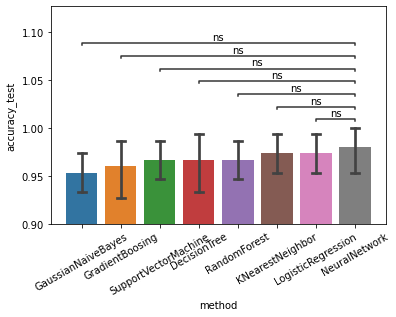

In [12]:
import seaborn as sns
from statannot import add_stat_annotation
ax = sns.barplot(x="method", y="accuracy_test", data=df_results, capsize=.2, 
                 order=df_results.groupby('method').mean().sort_values('accuracy_test').index)
ax.set(ylim=(0.90, 1.01))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);
test_results = add_stat_annotation(ax, data=df_results, x="method", y="accuracy_test",
                    order=df_results.groupby('method').mean().sort_values('accuracy_test').index,
                    box_pairs=[(df_acc_test.iloc[0,0], df_acc_test.iloc[7,0]),
                                (df_acc_test.iloc[1,0], df_acc_test.iloc[7,0]),
                                (df_acc_test.iloc[2,0], df_acc_test.iloc[7,0]),
                                (df_acc_test.iloc[3,0], df_acc_test.iloc[7,0]),
                                (df_acc_test.iloc[4,0], df_acc_test.iloc[7,0]),
                                (df_acc_test.iloc[5,0], df_acc_test.iloc[7,0]),
                                (df_acc_test.iloc[6,0], df_acc_test.iloc[7,0])],
                    test='Wilcoxon', text_format='star', comparisons_correction=None, 
                    loc='inside', verbose=2)
test_results

## 머신러닝 Shuffle split 교차 검증(cross validation)
iris 데이터를 5-fold shuffle split 교차검증(40회)으로 8개 모델을 학습하고 예측하여 평가한다.

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
import time

results=[]
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
i=0
skf = StratifiedShuffleSplit(n_splits=40,test_size=0.2, random_state=0)
for train_idx, test_idx in skf.split(X,y):
    x_train = df.iloc[train_idx,:-1]
    y_train = df.iloc[train_idx,-1]
    x_test = df.iloc[test_idx,:-1]
    y_test = df.iloc[test_idx,-1]
    # 1. Logistic regression    
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(max_iter=1000)
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    results.append([i,'LogisticRegression',accuracy_train,accuracy_test, training_time])
    # 2. Decision tree
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier()
    start_time = time.time()    
    model.fit(x_train, y_train)
    training_time = time.time() - start_time    
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    results.append([i,'DecisionTree',accuracy_train,accuracy_test, training_time])
    # 3. Support vector machine
    from sklearn.svm import SVC
    model = SVC()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    results.append([i,'SupportVectorMachine',accuracy_train,accuracy_test, training_time])  
    # 4. Gaussian naive bayes
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    results.append([i,'GaussianNaiveBayes',accuracy_train,accuracy_test, training_time])  
    # 5. K nearest neighbor
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    results.append([i,'KNearestNeighbor',accuracy_train,accuracy_test, training_time])   
    # 6. Random forest
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    results.append([i,'RandomForest',accuracy_train,accuracy_test, training_time])
    # 7. Gradient boosing
    from sklearn.ensemble import GradientBoostingClassifier
    model = GradientBoostingClassifier()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    results.append([i,'GradientBoosing',accuracy_train,accuracy_test, training_time])
    # 8. Neural network
    from sklearn.neural_network import MLPClassifier
    model = MLPClassifier(max_iter=1000)
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    results.append([i,'NeuralNetwork',accuracy_train,accuracy_test, training_time])        
    i+=1

## 교차검증 결과 종합

In [14]:
df_results =pd.DataFrame(data=results, 
                columns= ['iter','method','accuracy_train','accuracy_test','training_time'])

import numpy as np
#df_acc_test = df_results[["iter","method","accuracy_test"]].pivot_table(index='method', columns='iter')
df_acc_test = df_results.pivot_table(index='method', columns='iter')["accuracy_test"].reset_index()
df_acc_test['mean']=np.mean(df_acc_test, axis=1)
df_acc_test=df_acc_test.sort_values('mean')
df_acc_test

iter,method,0,1,2,3,4,5,6,7,8,...,31,32,33,34,35,36,37,38,39,mean
0,DecisionTree,0.966667,1.0,0.933333,0.966667,0.933333,0.900000,1.000000,0.966667,0.966667,...,0.966667,0.933333,1.0,0.933333,0.966667,0.933333,0.933333,0.966667,0.966667,0.949167
1,GaussianNaiveBayes,0.966667,1.0,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.933333,...,0.966667,0.966667,1.0,1.000000,0.966667,0.933333,0.966667,0.966667,0.966667,0.955000
2,GradientBoosing,0.966667,1.0,0.966667,0.966667,0.966667,0.933333,1.000000,0.966667,0.933333,...,0.966667,0.966667,1.0,0.966667,0.966667,0.966667,0.933333,0.966667,0.966667,0.956667
6,RandomForest,0.933333,1.0,0.966667,0.966667,0.966667,0.966667,1.000000,0.966667,0.966667,...,0.966667,0.933333,1.0,0.966667,0.966667,0.933333,0.933333,0.966667,0.966667,0.956667
7,SupportVectorMachine,1.000000,1.0,0.900000,0.966667,0.933333,0.933333,1.000000,0.966667,0.966667,...,1.000000,1.000000,1.0,0.966667,0.966667,0.933333,0.933333,0.966667,0.966667,0.960000
4,LogisticRegression,1.000000,1.0,0.966667,1.000000,0.966667,0.933333,1.000000,0.966667,0.966667,...,1.000000,1.000000,1.0,0.966667,0.966667,0.933333,0.933333,0.966667,0.966667,0.963333
3,KNearestNeighbor,1.000000,1.0,0.966667,1.000000,0.966667,0.900000,1.000000,0.966667,0.966667,...,0.966667,1.000000,1.0,0.966667,0.933333,0.966667,0.933333,0.966667,0.966667,0.964167
5,NeuralNetwork,1.000000,1.0,0.966667,1.000000,1.000000,0.966667,1.000000,0.966667,0.966667,...,0.966667,1.000000,1.0,0.966667,0.966667,1.000000,0.966667,1.000000,1.000000,0.975000


## 교차검증 결과 통계 검정 (NeuralNetwork vs. 나머지)

In [15]:
import numpy as np
from scipy import stats

# 비모수적 검정(parametric test)
for i in range(7):
    print(df_acc_test.iloc[i,0], 'vs.', df_acc_test.iloc[7,0],
          stats.wilcoxon(df_acc_test.iloc[i,1:-1], df_acc_test.iloc[7,1:-1])) # Wilcoxon signed-rank test

DecisionTree vs. NeuralNetwork WilcoxonResult(statistic=58.5, pvalue=0.00039829423619873754)
GaussianNaiveBayes vs. NeuralNetwork WilcoxonResult(statistic=63.5, pvalue=0.003198303643701715)
GradientBoosing vs. NeuralNetwork WilcoxonResult(statistic=70.0, pvalue=0.002406432527456217)
RandomForest vs. NeuralNetwork WilcoxonResult(statistic=38.5, pvalue=0.0032272508919119333)
SupportVectorMachine vs. NeuralNetwork WilcoxonResult(statistic=96.0, pvalue=0.036251050877088534)
LogisticRegression vs. NeuralNetwork WilcoxonResult(statistic=78.0, pvalue=0.058280353940897964)
KNearestNeighbor vs. NeuralNetwork WilcoxonResult(statistic=36.0, pvalue=0.009352176037991145)


## 테스트 데이터셋 정확도 플랏 (유의성기호 추가)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
KNearestNeighbor v.s. NeuralNetwork: Wilcoxon test (paired samples), P_val=9.352e-03 stat=3.600e+01
Using zero_method  wilcox
LogisticRegression v.s. NeuralNetwork: Wilcoxon test (paired samples), P_val=5.828e-02 stat=7.800e+01
Using zero_method  wilcox
SupportVectorMachine v.s. NeuralNetwork: Wilcoxon test (paired samples), P_val=3.625e-02 stat=9.600e+01
Using zero_method  wilcox
RandomForest v.s. NeuralNetwork: Wilcoxon test (paired samples), P_val=3.227e-03 stat=3.850e+01
Using zero_method  wilcox
GradientBoosing v.s. NeuralNetwork: Wilcoxon test (paired samples), P_val=2.406e-03 stat=7.000e+01
Using zero_method  wilcox
GaussianNaiveBayes v.s. NeuralNetwork: Wilcoxon test (paired samples), P_val=3.198e-03 stat=6.350e+01
Using zero_method  wilcox
DecisionTree v.s. NeuralNetwork: Wilcoxon test (pai

(<matplotlib.axes._subplots.AxesSubplot at 0x2d908182f10>,
  <statannot.StatResult.StatResult at 0x2d9082474c0>])

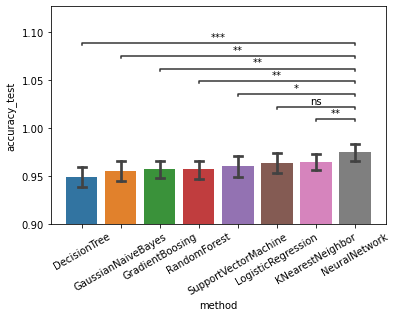

In [17]:
import seaborn as sns
from statannot import add_stat_annotation
ax = sns.barplot(x="method", y="accuracy_test", data=df_results, capsize=.2, 
                 order=df_results.groupby('method').mean().sort_values('accuracy_test').index)
ax.set(ylim=(0.90, 1.01))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);
test_results = add_stat_annotation(ax, data=df_results, x="method", y="accuracy_test",
                    order=df_results.groupby('method').mean().sort_values('accuracy_test').index,
                    box_pairs=[(df_acc_test.iloc[0,0], df_acc_test.iloc[7,0]),
                                (df_acc_test.iloc[1,0], df_acc_test.iloc[7,0]),
                                (df_acc_test.iloc[2,0], df_acc_test.iloc[7,0]),
                                (df_acc_test.iloc[3,0], df_acc_test.iloc[7,0]),
                                (df_acc_test.iloc[4,0], df_acc_test.iloc[7,0]),
                                (df_acc_test.iloc[5,0], df_acc_test.iloc[7,0]),
                                (df_acc_test.iloc[6,0], df_acc_test.iloc[7,0])],
                    test='Wilcoxon', text_format='star', comparisons_correction=None, 
                    loc='inside', verbose=2)
test_results